### This is a pretty boring file - I just use it to develop my electronics inverse function and test it

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
def dataGen(amp, T0):
    wf = empty(3500)
    length = len(wf)
    cc_slow = 2.5+0.4*random.normal(); cc_slow=cc_slow/(cc_slow+1); ##charge collection slow time constant

    cc_fast = 1./2.5; #charge collection fast time constant
    alpha_cr = 1250./(1250.+1.); #fall time of output
    alpha_rc1 = 1./2.75;
    alpha_rc2 = 1./2.75;
    step=zeros(2);charge=zeros(2);cur_s=zeros(2);cur_f=zeros(2);cr=zeros(2);rc1=zeros(2);rc2=zeros(2);

    for i in range(length):
        if i>=T0:
            step[i%2]=1.
        else:
            step[i%2]=0.
        cur_s[i%2]=cc_slow*(cur_s[(i+1)%2]+step[i%2]-step[(i+1)%2]);
        cur_f[i%2]=cc_fast*(cur_s[i%2]-cur_f[(i+1)%2])+cur_f[(i+1)%2];
        charge[i%2]=charge[(i+1)%2]+amp*cur_f[i%2]*(1./cc_slow-1.);
        cr[i%2]=alpha_cr*(cr[(i+1)%2]+charge[i%2]-charge[(i+1)%2]);
        rc1[i%2]=alpha_rc1*(cr[i%2]-rc1[(i+1)%2])+rc1[(i+1)%2];
        rc2[i%2]=alpha_rc2*(rc1[i%2]-rc2[(i+1)%2])+rc2[(i+1)%2];

        wf[i] = rc2[i%2];
    return wf

In [3]:
from numba import jit

In [4]:
@jit(nopython=True)
def rc2_cr(wf):
    wf2 = empty(3500)
    length = len(wf2)
    alpha_cr = 1250./(1250.+1.); #fall time of output
    alpha_rc1 = 1./2.75;
    alpha_rc2 = 1./2.75;    
    zrc1 = zeros(2)
    zcr = zeros(2)
    zcharge = zeros(2)
    zrc2 = wf[:2].copy()
    for i in range(length):
        zrc2[i%2] = wf[i]
        
        zrc1[i%2] = (zrc2[i%2] - zrc2[(i+1)%2])/alpha_rc2 + zrc2[(i+1)%2]
        zcr[i%2] = (zrc1[i%2] - zrc1[(i+1)%2])/alpha_rc1 + zrc1[(i+1)%2]
        zcharge[i%2] = (zcr[i%2]/alpha_cr) - zcr[(i+1)%2] + zcharge[(i+1)%2] 

        wf2[i] = zcharge[i%2]
    
    return wf2

In [8]:
wf1 = dataGen(100,1000)

In [9]:
wf2 = rc2_cr(wf1)

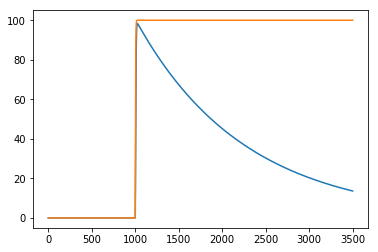

In [10]:
plot(wf1)
plot(wf2)